<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_NN/blob/lesson2/GB_NN_intro_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1.

Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?
Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Label is 5
Label is 5
Label is 0


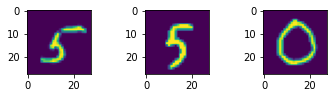

In [ ]:
for i in range(3):
  ind = np.random.randint(0, train_images.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[ind])
  print(f'Label is {train_labels[ind]}')

In [ ]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [ ]:
input_size = train_images.shape[1]
# print(input_size)

In [ ]:
def test_nn(train_images,
            train_labels,
            test_images,
            test_labels,
            n_layers: int = 2,
            n1_neuron: int = 64,
            n2_neuron: int = 64,
            optimizer: str = 'adam',
            n_epochs: int = 5,
            batch_size: int = 32,
            validation_split: float = 0.2,
            verbose=True):
  

  # Build the model.

  model = Sequential()
  model.add(Dense(n1_neuron, input_shape=(input_size,), activation='relu'))
  # model.add(Dense(n2_neuron, activation='tanh'))
  # Если хотим хотим увеличить количество слоёв больше двух, то будем добавлять 
  if n_layers > 2: 
    for k in range(n_layers-2):
      model.add(Dense(n2_neuron, activation='tanh'))

  # выходной слой.
  model.add(Dense(10, activation='softmax'))


  # Compile the model.
  model.compile(
  optimizer=optimizer,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
  )

  # Train the model.
  history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=n_epochs,
  batch_size=batch_size,
  validation_split=validation_split,
  verbose=verbose
  )

  # Evaluate the model.
  model.evaluate(
  test_images,
  to_categorical(y_test)
  )

  return history.history

## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [ ]:
res_dict={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict[n_neurons] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.0953 - accuracy: 0.9742


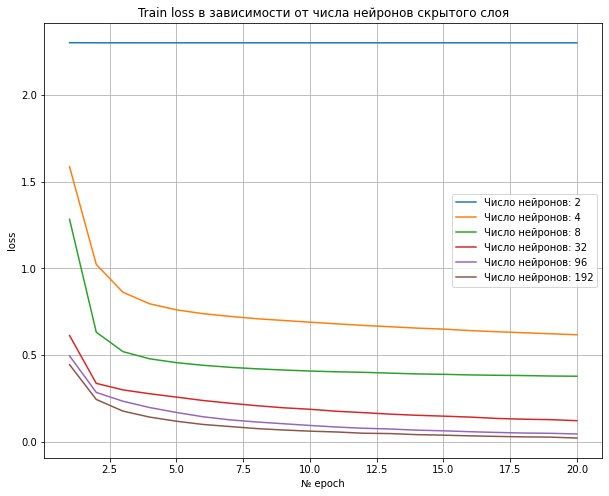

In [ ]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя')
plt.show()

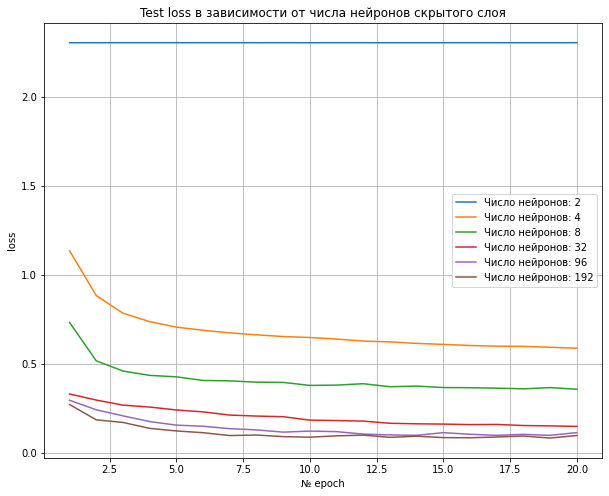

In [ ]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя')
plt.show()

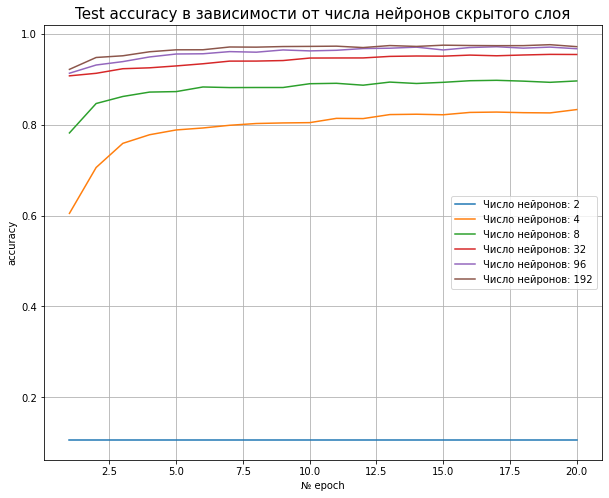

In [ ]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict:
        plt.plot(x, res_dict[n_neur]['val_accuracy'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

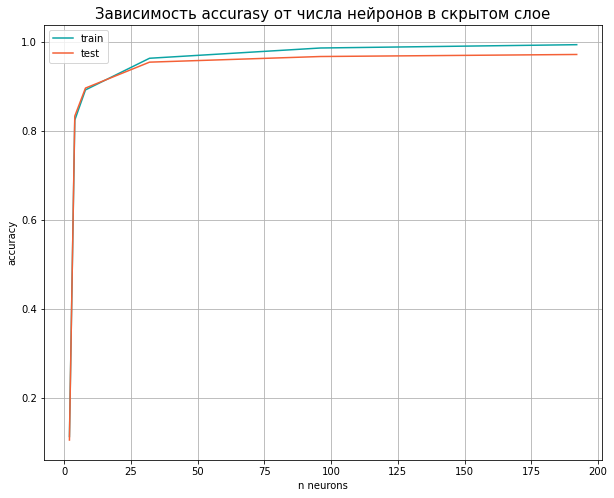

In [ ]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict[n_neur]['accuracy'][19] for n_neur in res_dict]
res_test = [res_dict[n_neur]['val_accuracy'][19] for n_neur in res_dict]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Увеличение числа нейронов в скрытом слое двухслойной сети увеличивает качество модели. Впрочем, существует предел улучшения.

## **Провeрка обучения с разным количеством скрытых слоев**

In [ ]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_2 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_2[n] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.1284 - accuracy: 0.9637


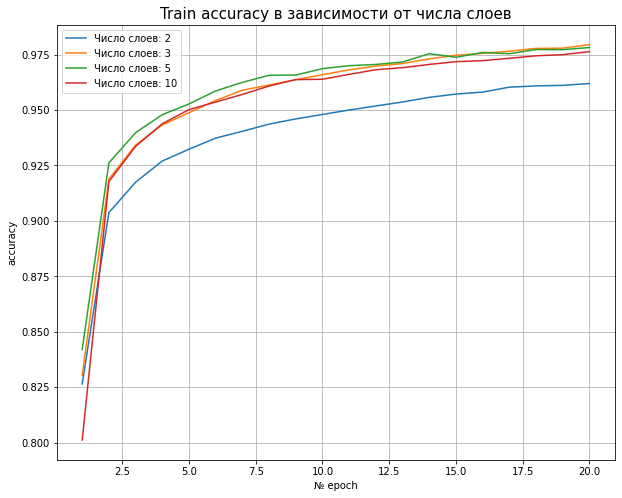

In [ ]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_2:
        plt.plot(x, res_dict_2[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

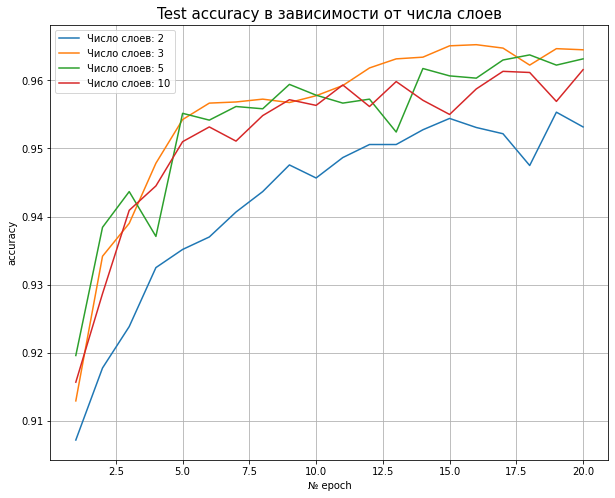

In [ ]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_2:
        plt.plot(x, res_dict_2[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев',size=15)
plt.show()

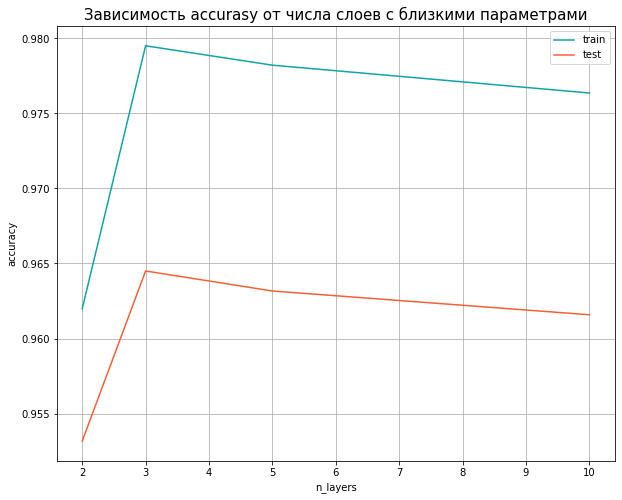

In [ ]:
# n_layers = [2, 3, 5, 10]
res_train = [res_dict_2[n_lay]['accuracy'][19] for n_lay in res_dict_2]
res_test = [res_dict_2[n_lay]['val_accuracy'][19] for n_lay in res_dict_2]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

При создании слоёв с одинаковыми параметрами лучше всего показала себя сеть с 5 слоями. Впрочем, и 3 и 10 слоёв также показали себя достаточно хорошо.

## Провeрка обучения с разными оптимизаторами
(Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.)

In [ ]:
res_dict_3 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_3[optim] = test_nn(train_images, train_labels, test_images, test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.1146 - accuracy: 0.9659


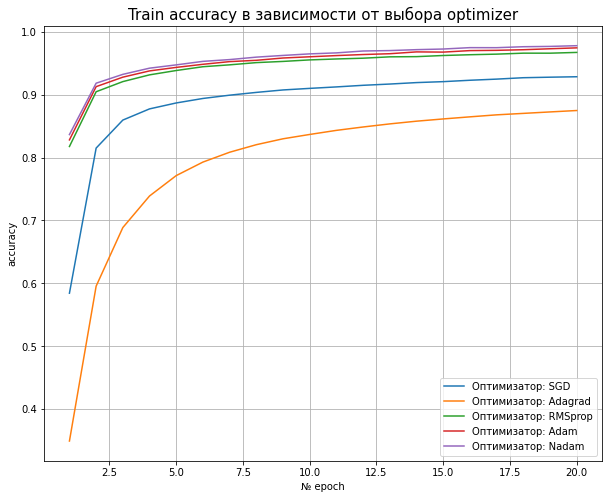

In [ ]:
plt.figure(figsize=(10, 8))
for optim in res_dict_3:
        plt.plot(x, res_dict_3[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

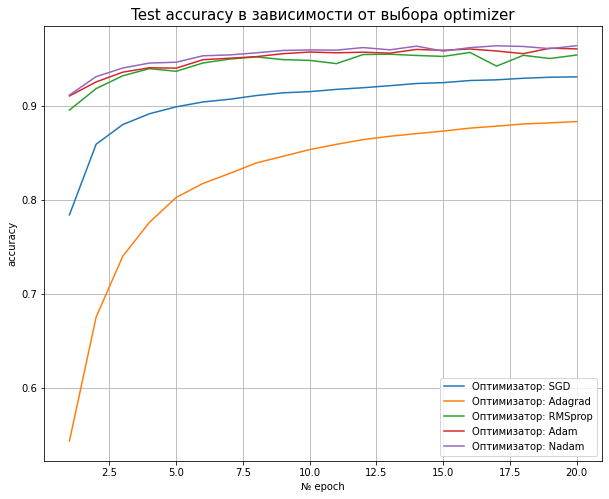

In [ ]:
plt.figure(figsize=(10, 8))
for optim in res_dict_3:
        plt.plot(x, res_dict_3[optim]['val_accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от выбора optimizer', size=15)
plt.show()

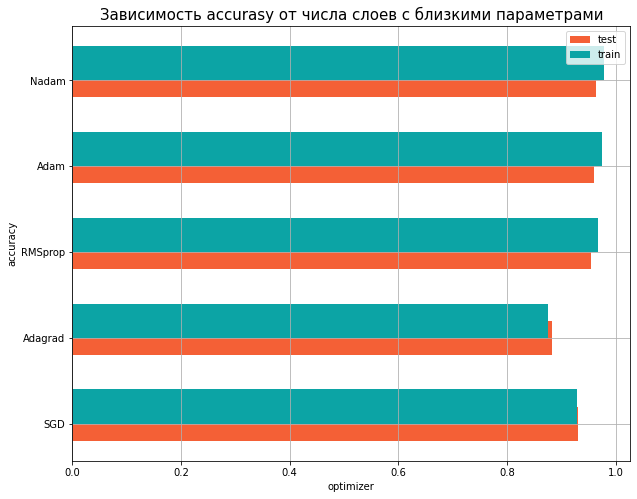

In [ ]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_3[optim]['accuracy'][19] for optim in res_dict_3]
res_test = [res_dict_3[optim]['val_accuracy'][19] for optim in res_dict_3]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Хуже всего показали себя оптимизаторы adagrad и sgd. Остальные показали примерно равные результаты.


In [ ]:
model_fin = Sequential([
    Dense(96, input_shape=(28 * 28,), activation='tanh'),
    Dense(96, activation='tanh'),
    Dense(10, activation='softmax')
])
model_fin.compile(loss='categorical_crossentropy', 
                optimizer='Nadam', 
                metrics=['accuracy'])

mod = model_fin.fit(train_images, to_categorical(train_labels),
                  epochs=40,
                  batch_size=128, 
                  verbose=0,
                  validation_split=0.2)

mod.history

{'loss': [0.4556708037853241,
  0.21858420968055725,
  0.15576975047588348,
  0.11879067867994308,
  0.09498459845781326,
  0.07916978001594543,
  0.06667586416006088,
  0.0569106750190258,
  0.048604320734739304,
  0.043166253715753555,
  0.03658968582749367,
  0.03107013739645481,
  0.029709825292229652,
  0.022927096113562584,
  0.020477011799812317,
  0.02001313865184784,
  0.017647521570324898,
  0.01595211960375309,
  0.014620806090533733,
  0.015637604519724846,
  0.012151039205491543,
  0.010431989096105099,
  0.012916644103825092,
  0.014043787494301796,
  0.012848961167037487,
  0.007032678462564945,
  0.010405506007373333,
  0.011060839518904686,
  0.009339575655758381,
  0.011788145639002323,
  0.010968643240630627,
  0.012328297831118107,
  0.00992234330624342,
  0.009182143956422806,
  0.004507460631430149,
  0.0019358888966962695,
  0.016414087265729904,
  0.012780527584254742,
  0.005056598223745823,
  0.006767375860363245],
 'accuracy': [0.867437481880188,
  0.93575000

In [ ]:
print(f"Метрика на train: {max(mod.history['accuracy'])}", 
      f"Метрика на test: {max(mod.history['val_accuracy'])}", sep="\n")

Метрика на train: 0.9997291564941406
Метрика на test: 0.9769999980926514


In [ ]:
N = 5
y_pred = model_fin.predict(test_images)
y_pred_class = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_test = to_categorical(test_labels)

In [ ]:
y_test_labels = np.argmax(y_test, axis=1)

In [ ]:
test_confusion_matrix = confusion_matrix(y_test_labels, y_pred_class)
print(test_confusion_matrix)

[[ 969    1    1    1    1    3    2    1    1    0]
 [   0 1124    1    0    0    2    2    1    4    1]
 [   6    1  997    9    2    0    1   10    6    0]
 [   0    1    4  969    0   16    0    8    7    5]
 [   0    0    3    1  950    4    6    2    4   12]
 [   2    0    0    4    0  877    3    1    5    0]
 [   7    2    1    1    4    7  932    0    4    0]
 [   0    6    7    2    1    0    0 1007    2    3]
 [   3    1    0    3    2    9    2    3  949    2]
 [   1    3    0    4    6   11    0   10    6  968]]


In [ ]:
print(classification_report(y_test_labels, y_pred_class))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.97      0.96      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.94      0.98      0.96       892
           6       0.98      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# Задание 2.

Используем набор примеров fashion-MNIST

1) Опишите - какой результат нейросети получен в зависимости от:

* числа нейронов в слое (для 2-х слойной сети),

* числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).

* фиксируйте для тренировочного и тестового набора метрики accuracy.

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


In [ ]:
X_train.min(), X_train.max()

(0, 255)

In [ ]:
classes = {'0': 'T-shirt/top',
           '1': 'Trouser',
           '2': 'Pullover',
           '3': 'Dress',
           '4': 'Coat',
           '5': 'Sandal',
           '6': 'Shirt',
           '7': 'Sneaker',
           '8': 'Bag',
           '9': 'Ankle boot'}

Label is 5
Label is 2
Label is 6


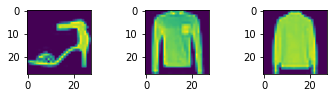

In [ ]:
for i in range(3):
  ind = np.random.randint(0, X_train.shape[0])
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[ind])
  print(f'Label is {y_train_labels[ind]}')

In [ ]:
# Normalize the images.
X_train = (X_train / 255.0)
X_test = (X_test / 255.0)

print(X_train.min(), X_train.max())

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape) # (60000, 784)
print(X_test.shape)

0.0 1.0
(60000, 784)
(10000, 784)


In [ ]:
input_size = X_test.shape[1]

## **Проверка обучения с разным количеством нейронов скрытого слоя**

In [ ]:
res_dict_4={}
x = np.linspace(1, 20, 20)
for n_neurons in [2, 4, 8, 32, 96, 192]:
    res_dict_4[n_neurons] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=n_neurons,
                                   n2_neuron=None,
                                   n_layers=2,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.3569 - accuracy: 0.8837


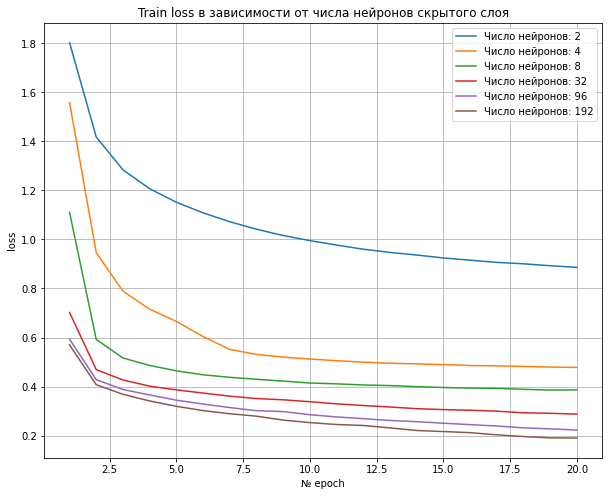

In [ ]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict_4[n_neur]['loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Train loss в зависимости от числа нейронов скрытого слоя')
plt.show()

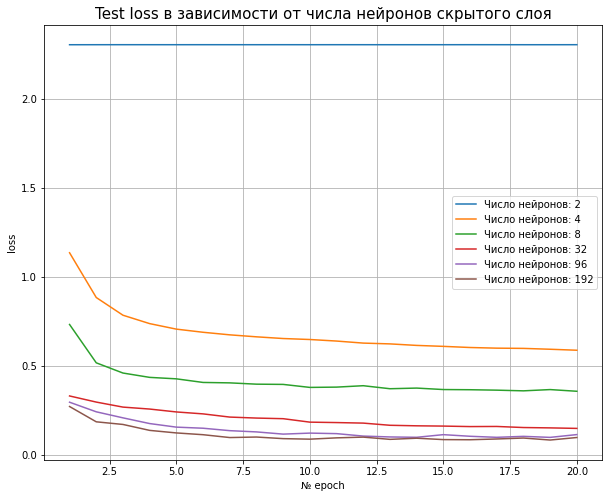

In [ ]:
plt.figure(figsize=(10, 8))
for n_neur in res_dict_4:
        plt.plot(x, res_dict[n_neur]['val_loss'], label=f'Число нейронов: {n_neur}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('loss')
plt.title('Test loss в зависимости от числа нейронов скрытого слоя', size=15)
plt.show()

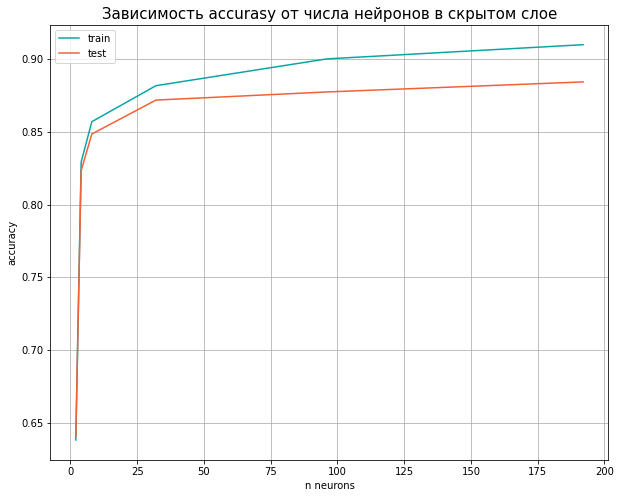

In [ ]:
n_n = [2, 4, 8, 32, 96, 192]

res_train = [res_dict_4[n_neur]['accuracy'][10] for n_neur in res_dict_4]
res_test = [res_dict_4[n_neur]['val_accuracy'][10] for n_neur in res_dict_4]

plt.figure(figsize=(10, 8))
plt.plot(n_n, res_train, label='train', c='#0CA4A5')
plt.plot(n_n, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=15)
plt.grid()
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## **Проверка обучения с разным количеством скрытых слоев**

In [ ]:
# (2, 3, 5, 10) - кол-во слоев
res_dict_5 = {}
num_layers = (2, 3, 5, 10)
x = np.linspace(1, 20, 20)
for n in num_layers:
    res_dict_5[n] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=n,
                                   optimizer='adam',
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.3840 - accuracy: 0.8671


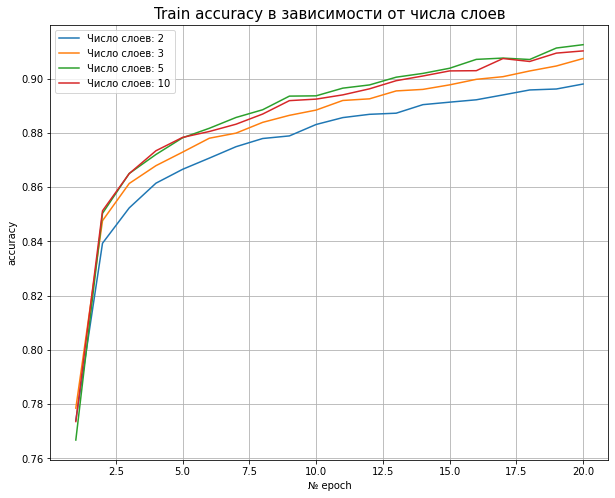

In [ ]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от числа слоев', size=15)
plt.show()

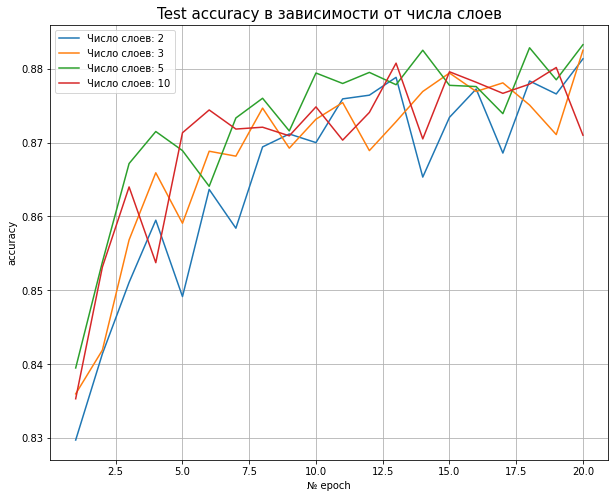

In [ ]:
plt.figure(figsize=(10, 8))
for n_layers in res_dict_5:
        plt.plot(x, res_dict_5[n_layers]['val_accuracy'], label=f'Число слоев: {n_layers}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Test accuracy в зависимости от числа слоев', size=15)
plt.show()

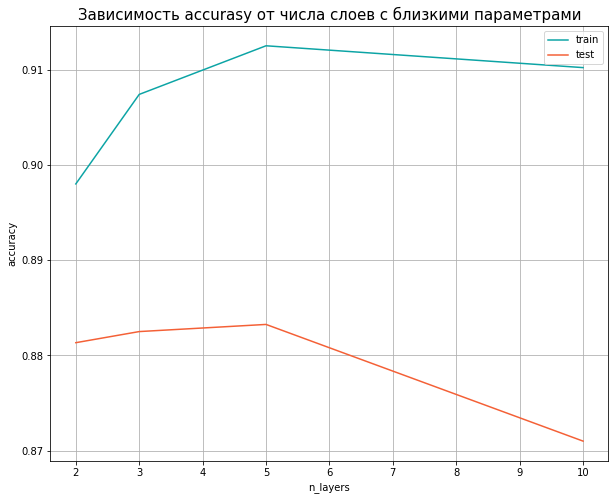

In [ ]:
res_train = [res_dict_5[n_lay]['accuracy'][19] for n_lay in res_dict_5]
res_test = [res_dict_5[n_lay]['val_accuracy'][19] for n_lay in res_dict_5]

plt.figure(figsize=(10, 8))
plt.plot(num_layers, res_train, label='train', c='#0CA4A5')
plt.plot(num_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Лучше всего показал вариант с тремя слоями.

## Провeрка обучения с разными оптимизаторами

2) Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.

In [ ]:
res_dict_6 = {}
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
x = np.linspace(1, 20, 20)
for optim in optimizers:
    res_dict_6[optim] = test_nn(X_train, y_train_labels, X_test, y_test_labels,
                                   n1_neuron=32,
                                   n2_neuron=32,
                                   n_layers=3,
                                   optimizer=optim,
                                   n_epochs=20,
                                   batch_size=128,
                                   validation_split=0.2,
                                   verbose=False)

313/313 [==============================] - 1s 2ms/step - loss: 0.3670 - accuracy: 0.8721


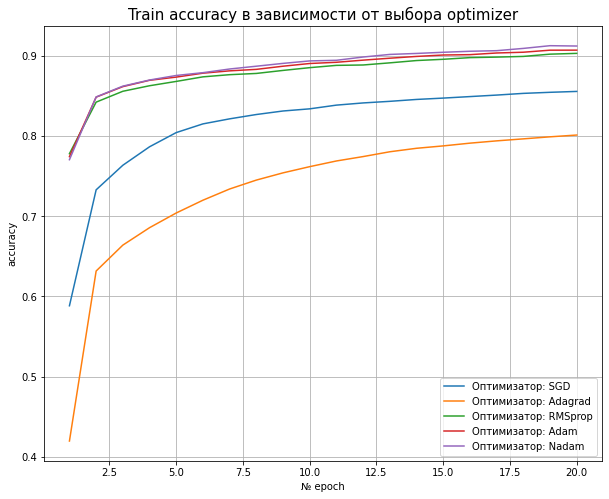

In [ ]:
plt.figure(figsize=(10, 8))
for optim in res_dict_6:
        plt.plot(x, res_dict_6[optim]['accuracy'], label=f'Оптимизатор: {optim}')
plt.legend(loc='best')
plt.grid()
plt.xlabel('№ epoch')
plt.ylabel('accuracy')
plt.title('Train accuracy в зависимости от выбора optimizer', size=15)
plt.show()

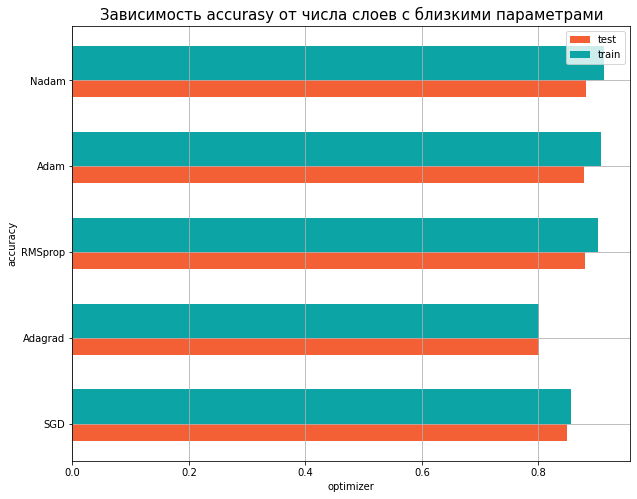

In [ ]:
# optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam', 'Nadam']
res_train = [res_dict_6[optim]['accuracy'][19] for optim in res_dict_6]
res_test = [res_dict_6[optim]['val_accuracy'][19] for optim in res_dict_6]

plt.figure(figsize=(10, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=15)
plt.grid()
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Лучше всего показал оптимизатор Nadam

## Вывод по улучшению

3) Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?

Увеличение числа нейронов, выбор оптимизатора, увеличение числа эпох. Также существует зависимость от размера батчей.

## Матрица

4) Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [ ]:
model_fin_2 = Sequential([
    Dense(96, input_shape=(28 * 28,), activation='tanh'),
    Dense(96, activation='tanh'),
    Dense(10, activation='softmax')
])
model_fin_2.compile(loss='categorical_crossentropy', 
                optimizer='Adam', 
                metrics=['accuracy'])

mod_2 = model_fin_2.fit(X_train, to_categorical(y_train_labels),
                  epochs=20,
                  batch_size=128, 
                  verbose=0,
                  validation_split=0.2)

mod_2.history

{'loss': [0.5525659322738647,
  0.3908040225505829,
  0.35211026668548584,
  0.3305993378162384,
  0.31004074215888977,
  0.2943181097507477,
  0.2785807251930237,
  0.2708100378513336,
  0.26055482029914856,
  0.2503975033760071,
  0.23978804051876068,
  0.23371876776218414,
  0.22296766936779022,
  0.2155417948961258,
  0.2124457061290741,
  0.20462825894355774,
  0.1958213448524475,
  0.19189420342445374,
  0.184153750538826,
  0.17973126471042633],
 'accuracy': [0.8063541650772095,
  0.8591458201408386,
  0.8724583387374878,
  0.8790624737739563,
  0.8858749866485596,
  0.8926458358764648,
  0.8972499966621399,
  0.9004999995231628,
  0.9029791951179504,
  0.9069166779518127,
  0.9106875061988831,
  0.9130833148956299,
  0.9169583320617676,
  0.9193958044052124,
  0.9195625185966492,
  0.9239374995231628,
  0.9275000095367432,
  0.9280208349227905,
  0.9317708611488342,
  0.9332291483879089],
 'val_loss': [0.44652530550956726,
  0.3770522177219391,
  0.37880581617355347,
  0.339291

In [ ]:
print(f"Метрика на train: {max(mod_2.history['accuracy'])}", 
      f"Метрика на test: {max(mod_2.history['val_accuracy'])}", sep="\n")

Метрика на train: 0.9332291483879089
Метрика на test: 0.8952500224113464


In [ ]:
N = 5
y_pred_2 = model_fin_2.predict(X_test)
y_pred_class_2 = np.argmax(y_pred_2, axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_test_2 = to_categorical(y_test_labels)

In [ ]:
y_test_labels_2 = np.argmax(y_test_2, axis=1)

In [ ]:
test_confusion_matrix = confusion_matrix(y_test_labels_2, y_pred_class_2)
print(test_confusion_matrix)

[[857   2  16  32   3   1  81   0   8   0]
 [  3 975   0  17   2   0   2   0   1   0]
 [ 15   0 850  14  63   1  54   0   3   0]
 [ 17   7  14 913  22   0  23   0   4   0]
 [  1   1 122  42 793   1  35   0   5   0]
 [  0   0   0   1   0 946   0  29   3  21]
 [156   1  98  38  72   1 620   0  14   0]
 [  0   0   0   0   0   8   0 966   0  26]
 [  4   0   5   3   2   3   3   4 976   0]
 [  0   0   0   0   0   6   1  33   0 960]]


In [ ]:
print(classification_report(y_test_labels_2, y_pred_class_2))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.85      0.81      1000
           3       0.86      0.91      0.89      1000
           4       0.83      0.79      0.81      1000
           5       0.98      0.95      0.96      1000
           6       0.76      0.62      0.68      1000
           7       0.94      0.97      0.95      1000
           8       0.96      0.98      0.97      1000
           9       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.89      0.88     10000



In [ ]:
classification_report(y_test_labels_2, y_pred_class_2, 
                      output_dict=True, 
                      target_names=classes.values())

{'T-shirt/top': {'precision': 0.8138651471984806,
  'recall': 0.857,
  'f1-score': 0.8348757915245981,
  'support': 1000},
 'Trouser': {'precision': 0.9888438133874239,
  'recall': 0.975,
  'f1-score': 0.9818731117824774,
  'support': 1000},
 'Pullover': {'precision': 0.7692307692307693,
  'recall': 0.85,
  'f1-score': 0.8076009501187649,
  'support': 1000},
 'Dress': {'precision': 0.8613207547169811,
  'recall': 0.913,
  'f1-score': 0.8864077669902912,
  'support': 1000},
 'Coat': {'precision': 0.8286311389759665,
  'recall': 0.793,
  'f1-score': 0.8104241185487993,
  'support': 1000},
 'Sandal': {'precision': 0.9782833505687694,
  'recall': 0.946,
  'f1-score': 0.9618708693441789,
  'support': 1000},
 'Shirt': {'precision': 0.757020757020757,
  'recall': 0.62,
  'f1-score': 0.6816932380428806,
  'support': 1000},
 'Sneaker': {'precision': 0.936046511627907,
  'recall': 0.966,
  'f1-score': 0.9507874015748031,
  'support': 1000},
 'Bag': {'precision': 0.9625246548323472,
  'recall': 0